# How to create instances for the MFP paper

In [1]:
import numpy as np
import movingfp.gen as mfp

## Create a random instance

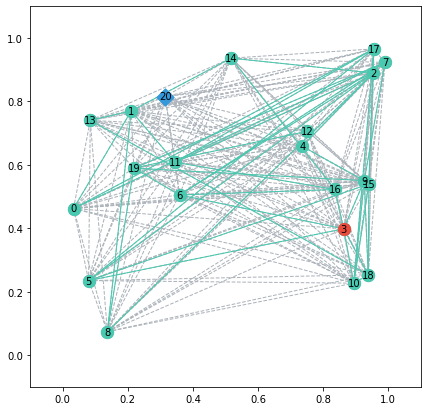

In [2]:
n = 20
p = 0.25
dim = 2
fighter_pos = None
num_fires = 1
seed = None
generator = np.random.default_rng()

instance = mfp.erdos_connected(n, p, dim, fighter_pos, num_fires, generator)

mfp.draw_mfp(instance)

## Create a random instance with seeded generator

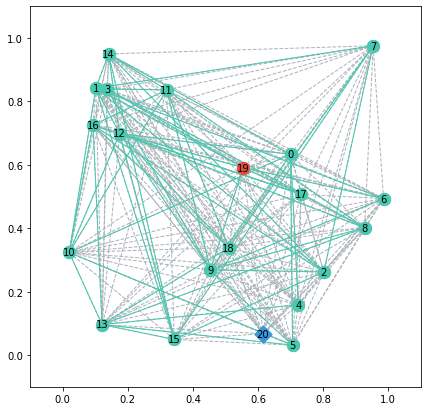

In [5]:
n = 20
p = 0.25
dim = 2
fighter_pos = None
num_fires = 1
seed = 6845406670007309403110730420044295152
generator = np.random.default_rng(seed)

instance = mfp.erdos_connected(n, p, dim, fighter_pos, num_fires, generator)

mfp.draw_mfp(instance)

## Create seed sequences for paper experiments

In [54]:
def get_seed(nodes, init_fires, instance):
    global_seed = 6845406670007309403110730420044295152
    node_list = [10, 20, 30, 40]
    instances = 10

    ss_global = np.random.SeedSequence(global_seed)

    # Spawn off 4 child SeedSequences (for 10, 20, 30 and 40 nodes)
    ss_child = ss_global.spawn(len(node_list))
    
    # Spawn off 10 grandchildren SeedSequences to pass to each generator.
    node_idx = node_list.index(nodes)
    ss_instances = ss_child[node_idx].spawn(instances)
    #generators = [np.random.default_rng(s) for s in ss]

    ss = ss_instances[instance]
    
    return ss

ss = get_seed(nodes=20, init_fires=2, instance=3)
print(ss)

SeedSequence(
    entropy=6845406670007309403110730420044295152,
    spawn_key=(1, 3),
)


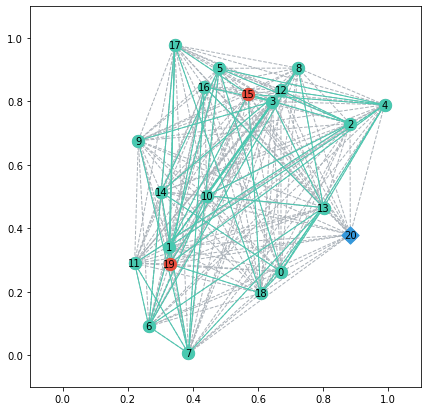

In [59]:
INSTANCE = 3

n = 20
p = 0.25
dim = 2
fighter_pos = None
num_fires = 2

ss = get_seed(nodes=n, init_fires=num_fires, instance=INSTANCE)
generator = np.random.default_rng(ss)

inst = mfp.erdos_connected(n, p, dim, fighter_pos, num_fires, generator)
mfp.draw_mfp(inst)